<a href="https://colab.research.google.com/github/StevenWestmoreland/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/DSPT6_U1_S3_IntermediateLinearAlgebraAssignment_StevenWestmoreland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
# import for whole assignment
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# create list of sales
sales_df=[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [3]:
# find the mean
total=sum(sales_df)
mean_sales=total/len(sales_df)
mean_sales

3052.714285714286

In [0]:
# find variance
def subtract_mean(number):
  return number-mean_sales

In [5]:
distances=list(map(subtract_mean,sales_df))
print(distances)
print(sales_df)

[452.2857142857142, -652.7142857142858, -25.71428571428578, -254.71428571428578, 647.2857142857142, 197.28571428571422, -363.7142857142858]
[3505, 2400, 3027, 2798, 3700, 3250, 2689]


In [6]:
squared_distances=list(map(lambda x: x**2, distances))
squared_distances

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
list_length=len(squared_distances)-1

In [8]:
variance_sales=sum(squared_distances)/list_length
print('{:.2f}'.format(variance_sales))

214387.90


In [9]:
# find Standard deviation
print(math.sqrt(variance_sales))

463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers=[127, 80, 105, 92, 120, 115, 93]

In [11]:
np.cov(sales_df,customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [12]:
# turn into a dataframe
last_week=pd.DataFrame({'sales':sales_df})
last_week['customers']=pd.Series(customers)
last_week.head()

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [13]:
# find standard deviations
std_sales=last_week['sales'].std()
std_customers=last_week['customers'].std()
cov_sc=last_week['sales'].cov(last_week['customers'])
cov_sc

7604.357142857142

In [0]:
# find denominator for correlation coefficient
denom=std_sales*std_customers

In [15]:
# correlation coefficient
corr_sc=cov_sc/denom
corr_sc

0.9628339778148909

In [16]:
# verify
last_week.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [17]:
column_names=['Entry','Pclass','Survived','Name','Sex','Age','Sibsp','Parch','Ticket','Fare','Cabin','Embarked','Boat','Body','Home_Dest','Cabin_Num']
titanic_df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv',header=None, names=column_names, skiprows=1)
titanic_df.head()

,Entry,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest,Cabin_Num
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [18]:
# Variance-Covariance matrix
titanic_df.cov()

,Entry,Pclass,Survived,Age,Sibsp,Parch,Fare,Body,Cabin_Num
Entry,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
Pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
Survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
Age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
Sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
Parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
Fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
Body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
Cabin_Num,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [19]:
# Correlation Matrix
titanic_df.corr()

,Entry,Pclass,Survived,Age,Sibsp,Parch,Fare,Body,Cabin_Num
Entry,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
Pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
Survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
Age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
Sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
Parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
Fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
Body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
Cabin_Num,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

A synonym for orthogonal is perpendicular.

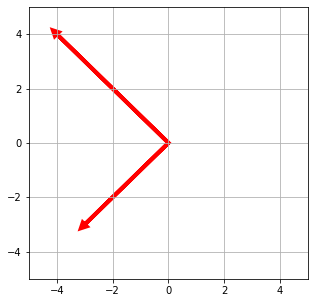

In [20]:
q=[-4,4]
h=[-3,-3]

fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Plot the vectors
for vect in [q,h]:
  plt.arrow(0,0,vect[0],vect[1],head_width=.2,head_length=.2,color='red',linewidth=4)

plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# establish arrays
a=np.array([-5,3,7])
b=np.array([6,-8,2])

In [22]:
np.dot(a,b)

-40

Vectors A and B are not orthoganol because their dot product does not equal zero. If we were to plot them, they would not be perpendictular to each other:

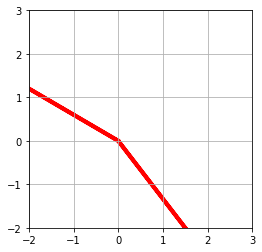

In [23]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,3)          
plt.ylim(-2,3)

# Plot the vectors
for vect in [a,b]:
  plt.arrow(0,0,vect[0],vect[1],head_width=.2,head_length=.2,color='red',linewidth=4)

plt.show()

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# create array
c=np.array([2,-15,6,20])

In [29]:
np.linalg.norm(c)**2

665.0

In [30]:
np.dot(c,c)

665

They are all equivalent.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d = 7(1,0) + 12(0,1)

e = 2(1,0,0) + 11(0,1,0) + -8(0,0,1)

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f=np.array([4,12,11,9,2])
norm_f=np.linalg.norm(f)

In [42]:
f_hat=f/norm_f
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

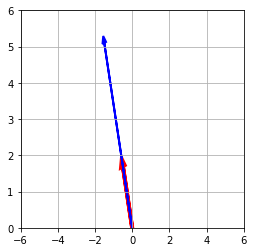

In [24]:
# linear dependant vectors
vd1=[-0.5,1.7,]
vd2=[-1.5,5.1,]

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-6,6)          
plt.ylim(-0,6)

# Plot the vectors
plt.arrow(0,0,vd1[0],vd1[1],head_width=.2,head_length=.2,color='red',linewidth=4)
plt.arrow(0,0,vd2[0],vd2[1],head_width=.2,head_length=.2,color='blue',linewidth=2)

plt.show()

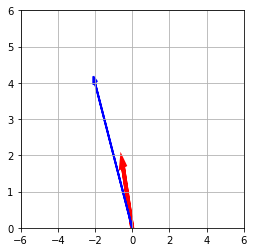

In [25]:
# linear independant vectors
vi1=[-0.5,1.7,]
vi2=[-2,4]

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-6,6)          
plt.ylim(-0,6)

# Plot the vectors
plt.arrow(0,0,vi1[0],vi1[1],head_width=.2,head_length=.2,color='red',linewidth=4)
plt.arrow(0,0,vi2[0],vi2[1],head_width=.2,head_length=.2,color='blue',linewidth=2)

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# set up arrays
g=np.array([1,2])
h=np.array([4,8])

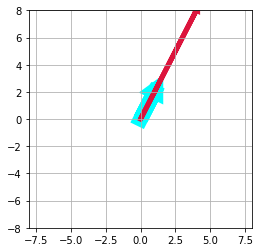

In [27]:
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-8,8)          
plt.ylim(-8,8)

for myvect, mycolor, width in [(g, 'cyan', 15), (h, 'crimson', 5)]:
  plt.arrow(0,0,myvect[0],myvect[1],head_width=.2,head_length=.2,color=mycolor,linewidth=width)

Their span is every point along the line that the two form if you stretch their arrows to infinity both in the positive and negative direction.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

All of 3d space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



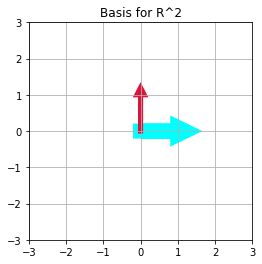

In [31]:
# find basis vectors in 2-d
v1 = [1, 0]
v2 = [0, 1]

# Plot the Scaled Vectors
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

for myvect, mycolor, width in [(v1, 'cyan', 15), (v2, 'crimson', 5)]:
  plt.arrow(0,0,myvect[0],myvect[1],head_width=.2,head_length=.2,color=mycolor,linewidth=width)

plt.title('Basis for R^2')
plt.show()

## 6.2 What does it mean to form a basis?

The basis are the two vectors (1,0) and (0,1) which can be scaled by any scalar a and b to then form any vector on R^2, vector (a,b). All vectors on R^2 can be broken down into a(1,0) + b(0,1) as a linear combination.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# create matrix
P=np.array([[1,2,3],
            [-1,0,7],
            [4,8,2]])


In [34]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Rank is the number of dimensions belonging to the output of a matrix's linear transformations. In this way it also tells us the number of linearly independant vectors in the row space of the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# Original vectors
v=np.array([1,3])
w=np.array([-1,2])

In [36]:
# dot product and projection
w_dot_v=np.dot(w,v)
v_dot_w=np.dot(v,w)
fraction=w_dot_v/v_dot_w
projection=np.multiply(fraction,v)
projection

array([1., 3.])

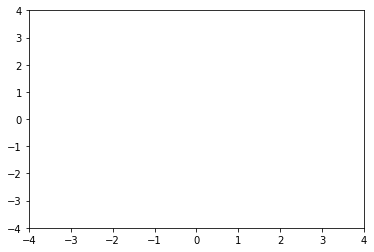

In [37]:
# Plot a line then get values for L
plt.xlim(-4,4)
plt.ylim(-4, 4)
axes = plt.gca()

In [0]:
x_vals=np.array(axes.get_xlim())
y_vals=3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


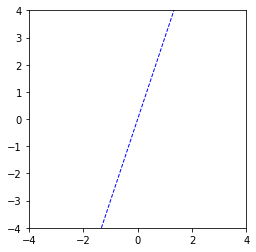

In [39]:
plt.xlim(-4,4)
plt.ylim(-4,4)

axes=plt.gca()
plt.axes().set_aspect('equal')
plt.plot(x_vals,y_vals,'--',color='b',linewidth=1)
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()